------------------------------------------------------------------------------------------------------------------------------------------------------

## CALIBRATION NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

You don't have latex installed. Changing default configuration to tex=False


In [33]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        False,
    "THRESHOLD":  100,
    "WIDTH":      5,
    "PROMINENCE": 0.3,
    "ACCURACY":   2000,
    "TERMINAL_MODE": False
    }

In [3]:
INPUT_FILE = "Feb22_2"; OV = 1; PRESET ="ANA"
info = read_input_file(INPUT_FILE)  # Read input file
channels = [0,1,6]
channels = [6]

#-------------------------------- LOAD RUNS ---------------------------------#
run_keys = ["CALIB_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    try:               nruns[key] = info[key][OV] # Store runs in dictionary
    except IndexError: nruns.pop(key)
print(nruns)

runs = dict.fromkeys(nruns.keys())
for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),branch_list=["AnaChargeAveRange","AnaChargeAveRangeSIGNAL","AnaPeakAmp","AnaPedSTD"],info=info,compressed=True)
# for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)

#----------------------------------------------------------------------------#

{'CALIB_RUNS': 2}
load_npy --> DONE!



### CUTS --> integrating/average

In [4]:
from scipy import stats as st

In [5]:

RUN2PLOT = "CALIB_RUNS"; ch = 0; key_peaktime = "AnaPeakTime"
peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>(st.mode(peak_time)[0]-20)
ptime_max = peak_time<(st.mode(peak_time)[0]+80)

CUT_ptime0 = ptime_min * ptime_max

RUN2PLOT = "CALIB_RUNS"; ch = 1; key_peaktime = "AnaPeakTime"
peak_time = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_peaktime]
ptime_min = peak_time>(st.mode(peak_time)[0]-20)
ptime_max = peak_time<(st.mode(peak_time)[0]+80)

CUT_ptime1 = ptime_min * ptime_max

CUT_ptime = CUT_ptime0 * CUT_ptime1

print("CUT peaktime min: %0.2f"%(len(peak_time[ptime_min==True])*100/len(peak_time)))
print("CUT peaktime max: %0.2f"%(len(peak_time[ptime_max==True])*100/len(peak_time)))
print("CUT peaktime min_max: %0.2f"%(len(peak_time[CUT_ptime])*100/len(peak_time)))

CUT peaktime min: 89.76
CUT peaktime max: 54.13
CUT peaktime min_max: 27.92


In [105]:
RUN2PLOT = "CALIB_RUNS"; ch = 6; key_pedstd = "AnaPedSTD"

ped_std = runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][key_pedstd]
std_min = ped_std>2.7
std_max = ped_std<3.3

CUT_std = std_min * std_max
print("CUT peak_amp min: %0.2f"%(len(ped_std[std_min==True])*100/len(ped_std)))
print("CUT peak_amp max: %0.2f"%(len(ped_std[std_max==True])*100/len(ped_std)))
print("CUT peak_amp min_max: %0.2f"%(len(ped_std[CUT_std])*100/len(ped_std)))

CUT peak_amp min: 91.76
CUT peak_amp max: 80.39
CUT peak_amp min_max: 72.14


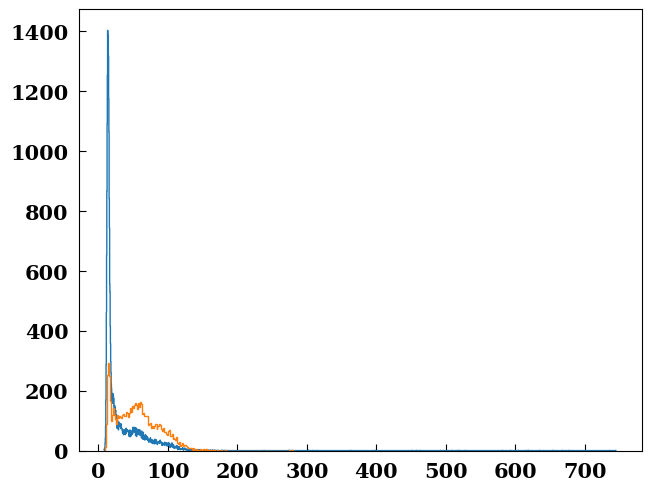

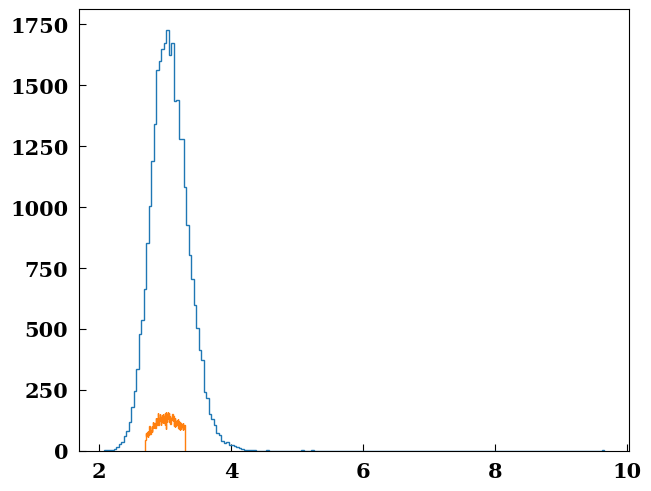

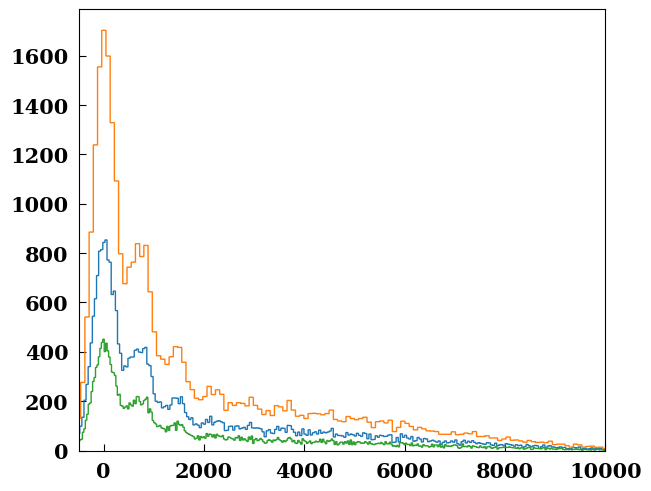

In [121]:
plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaPeakAmp"],bins=2000,histtype="step")
plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaPeakAmp"][CUT_ptime],bins=200,histtype="step")
plt.show()

plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaPedSTD"],bins=200,histtype="step")
plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaPedSTD"][CUT_std],bins=200,histtype="step")
plt.show()

plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaChargeAveRange"],bins=2000,histtype="step")
plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaChargeAveRangeSIGNAL"],bins=1000,histtype="step")
plt.hist(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch]["AnaChargeAveRangeSIGNAL"][CUT_std],bins=700,histtype="step")
plt.xlim([-500,10000])
plt.show()

In [9]:
my_xa = load_npy(np.asarray([2]).astype(int),np.asarray([6]).astype(int),preset="ALL",info=info,compressed=True)

load_npy --> DONE!



In [10]:
my_xa[2][6]["MyCuts"] = CUT_ptime

In [11]:
average_wvfs(my_xa, key="RawADC", cut_label="SIGNAL", label="Ana", centering="NONE", debug=False)
integrate_wvfs(my_xa, info=info, key="RawADC", label="Ana", cut_label="SIGNAL", debug=False)

save_proccesed_variables(my_xa, preset="INT",info=info, force=True, debug=False)

-> Found label Raw form key RawADC
Calculating average wvf with cuts
Computing ANA wvfs from RAW

--- Integrating RUN 2 CH 6 TYPE ChargeAveRange, REF AnaAveWvf ---
-> Found label Raw form key RawADC

--- Integrating RUN 2 CH 6 TYPE ChargePedRange, REF AnaAveWvf ---
-> Found label Raw form key RawADC
['TimeStamp', 'NBinsWvf', 'AnaAveWvfSIGNAL', 'AnaChargeRangeDict', 'AnaChargeAveRangeSIGNAL', 'AnaChargePedRange0SIGNAL', 'AnaChargePedRange1SIGNAL', 'AnaChargePedRange2SIGNAL']
File (TimeStamp.npz) OVERWRITTEN 
File (NBinsWvf.npz) OVERWRITTEN 
File (AnaAveWvfSIGNAL.npz) OVERWRITTEN 
Saving NEW file: AnaChargeRangeDict.npz
../data/Feb22_2/npy/run02_ch6/AnaChargeRangeDict.npz
Saving NEW file: AnaChargeAveRangeSIGNAL.npz
../data/Feb22_2/npy/run02_ch6/AnaChargeAveRangeSIGNAL.npz
Saving NEW file: AnaChargePedRange0SIGNAL.npz
../data/Feb22_2/npy/run02_ch6/AnaChargePedRange0SIGNAL.npz
Saving NEW file: AnaChargePedRange1SIGNAL.npz
../data/Feb22_2/npy/run02_ch6/AnaChargePedRange1SIGNAL.npz
Saving N

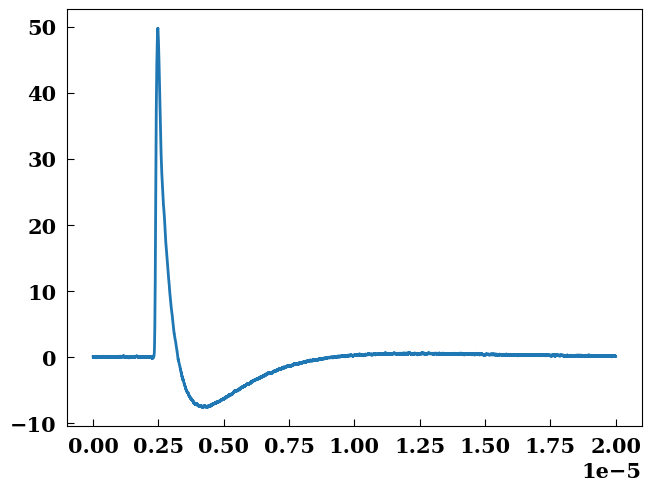

In [72]:
time = np.arange(len(my_xa[2][6]["AnaAveWvfSIGNAL"][0]))*my_xa[2][6]["Sampling"]
Aves  = my_xa[2][6]["AnaAveWvfSIGNAL"][0]

plt.plot(time,Aves)
plt.show()

In [55]:
runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch].keys()

dict_keys(['RawADC', 'RawPeakAmp', 'RawPeakTime', 'RawPedSTD', 'RawPedMean', 'RawPedMax', 'RawPedMin', 'RawPedLim', 'NBinsWvf', 'TimeStamp', 'Sampling', 'RawValleyAmp', 'RawValleyTime', 'RawPreTriggerSTD', 'RawPreTriggerMean', 'RawPreTriggerMax', 'RawPreTriggerMin', 'RawPedStart', 'RawPedEnd', 'AnaPeakAmp', 'AnaPeakTime', 'AnaValleyAmp', 'AnaValleyTime', 'AnaPreTriggerSTD', 'AnaPreTriggerMean', 'AnaPreTriggerMax', 'AnaPreTriggerMin', 'AnaPedSTD', 'AnaPedMean', 'AnaPedMax', 'AnaPedMin', 'AnaPedLim', 'AnaPedStart', 'AnaPedEnd', 'Label', 'PChannel'])

55119.44999999992
8.6899999999996


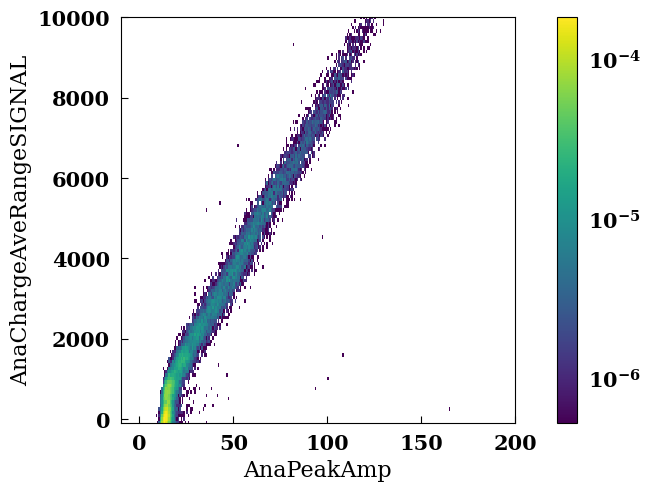

In [61]:
RUN2PLOT = "CALIB_RUNS"; ch = 6
xvar = "AnaPeakAmp"
yvar = "AnaChargeAveRangeSIGNAL"
plt.ioff()
for c,ch in enumerate(channels):
    plt.figure()
    plt.hist2d(runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][xvar],
               runs[RUN2PLOT][runs[RUN2PLOT]["NRun"][0]][ch][yvar],
               bins=1000,density=True, cmap = viridis, norm=LogNorm())
    plt.xlim([-10,200])
    plt.ylim([-100,10000])
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.colorbar()
    plt.ion()
    plt.show()

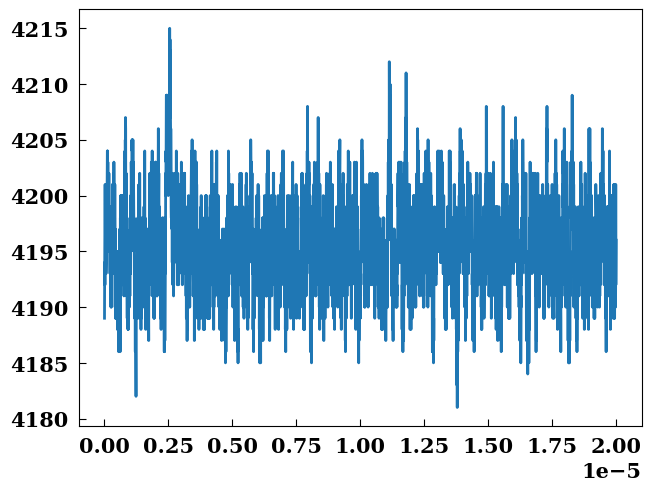

In [92]:
evt=19
time = np.arange(len(my_xa[2][6]["RawADC"][CUT_ptime][evt]))*my_xa[2][6]["Sampling"]
RawADC  = my_xa[2][6]["RawADC"][CUT_ptime][evt]

plt.plot(time,RawADC)

## BEFORE DECONVOLUTION


In [39]:
OPT["THRESHOLD"]  = 100
OPT["WIDTH"]      = 200
OPT["PROMINENCE"] = 0.2
OPT["ACCURACY"]   = 2000

In [51]:
params = {"THRESHOLD": 10, "WIDTH": 15, "PROMINENCE": 0.5, "ACCURACY": 500, "FIT": "gaussian"}
new_params = {}
for i,param in enumerate(params.keys()):
    if check_key(OPT,param) == True: new_params[param] = OPT[param]
    else:                            new_params[param] = params[param]

In [42]:
def fit_gaussians(x, y, *p0):
    assert x.shape == y.shape, "Input arrays must have the same shape."
    # try:
    popt, pcov = curve_fit(gaussian_train, x,y, p0=p0[0])
    fit_y=gaussian_train(x,*popt)
    chi_squared = np.sum((y[abs(fit_y)>0.1] - fit_y[abs(fit_y)>0.1]) ** 2 / fit_y[abs(fit_y)>0.1]) / (y.size - len(popt))
    plt.figure(dpi=200, figsize=(12, 6))
    fig = plt.axes()
    plt.plot(x, y, 'b-', label='data')
    plt.plot(x, fit_y, 'r-', label='fit',linewidth=1)
    plt.grid()
    return popt,fit_y,chi_squared

FOUNDED PEAKS: (array([686, 702, 720, 722]), {'peak_heights': array([867., 427., 216., 216.]), 'prominences': array([867., 104.,  53.,  53.]), 'left_bases': array([664, 696, 716, 716]), 'right_bases': array([957, 957, 957, 957]), 'widths': array([13.60965686,  7.14095238,  5.78409091,  5.78409091]), 'width_heights': array([433.5, 375. , 189.5, 189.5]), 'left_ips': array([680.41089109, 700.24      , 718.47727273, 718.47727273]), 'right_ips': array([694.02054795, 707.38095238, 724.26136364, 724.26136364])})


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2600.

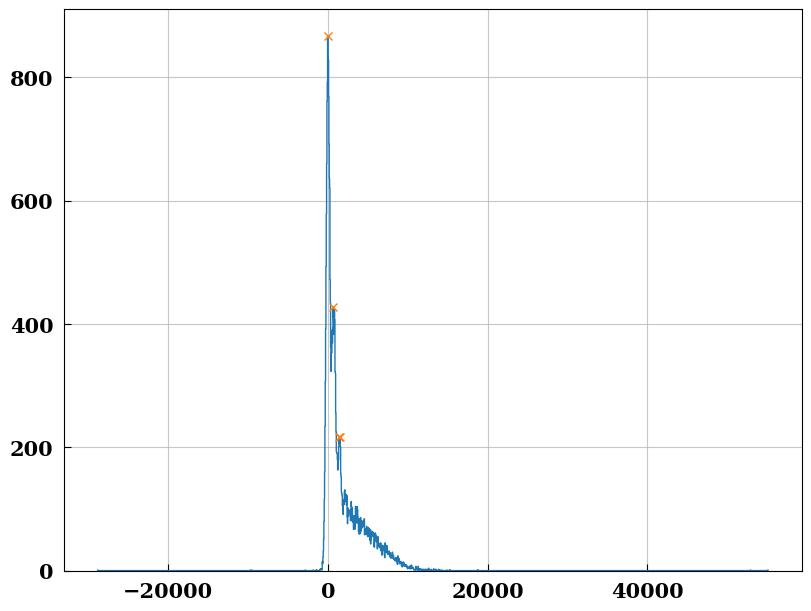

In [56]:
keys = ["AnaChargeAveRangeSIGNAL"]; 
density = OPT["NORM"]
binning = OPT["ACCURACY"]
debug = True
channels = [6]

for r,run in enumerate(runs["CALIB_RUNS"]):
    for c,ch in enumerate(channels):
        fig_cal, ax_cal = plt.subplots(1,1, figsize = (8,6)); add_grid(ax_cal)
        for key in keys: 
            counts, bins, bars = ax_cal.hist(runs["CALIB_RUNS"][runs["CALIB_RUNS"]["NRun"][0]][ch][key],bins = int(binning),histtype="step", label=key, density=density);
            
            # peaks = find_peaks(counts,height=new_params["THRESHOLD"],width=new_params["WIDTH"]) #,width=my_sigma[c]
            peaks = find_peaks(counts,height=150,width=4)
            ax_cal.plot(bins[peaks[0]],peaks[1]["peak_heights"],"x") #a Rodrigo le gustan las x para los picos jaja
            print("FOUNDED PEAKS:", peaks)
            counts,bins= np.histogram(runs["CALIB_RUNS"][runs["CALIB_RUNS"]["NRun"][0]][ch]["AnaChargeAveRangeSIGNAL"],int(binning));#need to convert to PE

            def fit_gaussians(x, y, *p0):
                assert x.shape == y.shape, "Input arrays must have the same shape."
                # try:
                popt, pcov = curve_fit(gaussian_train, x,y, p0=p0[0])
                fit_y=gaussian_train(x,*popt)
                chi_squared = np.sum((y[abs(fit_y)>0.1] - fit_y[abs(fit_y)>0.1]) ** 2 / fit_y[abs(fit_y)>0.1]) / (y.size - len(popt))
                plt.figure(dpi=200, figsize=(12, 6))
                fig = plt.axes()
                plt.plot(x, y, 'b-', label='data')
                plt.plot(x, fit_y, 'r-', label='fit',linewidth=1)
                plt.grid()
                return popt,fig, chi_squared

            params=np.zeros(len(peaks[0])*3)
            params[0::3]=peaks[1]["peak_heights"]
            params[1::3]=bins[peaks[0]]
            params[2::3]=1e2
            vars,fig,qs=fit_gaussians(bins[:-1],counts,params)     

        # plt.semilogy()
        plt.xlim([-1e3,bins[peaks[0][-1]]*5])
        fig_cal.suptitle("Run_{} Ch_{} - {} histogram".format(runs["CALIB_RUNS"]["NRun"][0],ch,key))
        fig_cal.supxlabel(key + " [ADC]"); fig_cal.supylabel("Counts")
        plt.legend()
        plt.show()

In [ ]:
popt, pcov, perr = calibrate(runs["CALIB_RUNS"], ["AnaChargeAveRange"], OPT=OPT, debug=False) #TO solve: not repeated plots

## AFTER DECONVOLUTION

In [ ]:
for c, ch in enumerate(channels):
    fast =np.sum(runs["CALIB_RUNS"][runs["CALIB_RUNS"]["NRun"][0]][ch]["DecADC"][:,500:1000],axis=1)
    total=np.sum(runs["CALIB_RUNS"][runs["CALIB_RUNS"]["NRun"][0]][ch]["DecADC"][:,500:3000],axis=1)

    plt.plot(total,fast/total,',')
    plt.ylim([0,1])
    plt.xlim([0,1000])
    CUT=(fast>0.7)*(total>130)
    plt.hist(total[CUT],200,[100,1000]);
    plt.semilogy()
    plt.grid()
    plt.show()

In [ ]:
# With cuts
f90 = fast/total
CUT_total = total>100
CUT_tf90  = f90>0.6
CUT = CUT_tf90*CUT_total

plt.figure(dpi=200)
Amp=np.max(runs["CALIB_RUNS"][runs["CALIB_RUNS"]["NRun"][0]][ch]["DecADC"],axis=1)
plt.plot(total[~CUT], Amp[~CUT], ",");
plt.plot(total[CUT] , Amp[CUT] , ",");
plt.xlim([0,1000])
plt.ylabel("Amp [Arb units]")
plt.xlabel("Charge [Arb units]")
x_ticks=np.arange(0,1000,1)
plt.plot(x_ticks,0.01*x_ticks)
plt.show()

## GAIN FIT

STORED GAINS ->  {0: [410.80262272211183, 404.4927197412551, 405.7285245504968, 414.6751422246748, -99.0], 6: [-99.0]}
STORED DGAIN ->  {0: [0.8091375331179175, 1.8507450960835337, 4.071357427213988, 8.00219503325073, -99.0], 6: [-99.0]}
Channel 0: G = 1.29 * OV + 403.14
No valid gains for channel 6


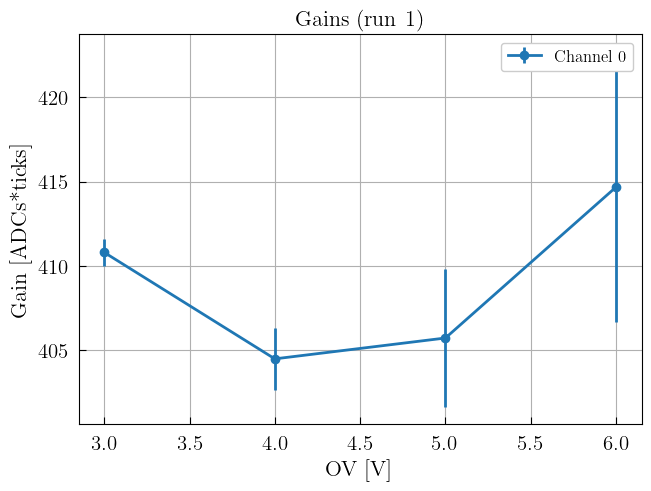

In [10]:
folder_path = "TUTORIAL"
channels    = [0,6];      run   = 1
my_ov       = [[3,4,5,6],[3]]; debug = False

gains, Dgain = get_gains(run,channels,folder_path=folder_path,debug=debug)
print("STORED GAINS -> ",gains)
print("STORED DGAIN -> ",Dgain)

for c,ch in enumerate(channels):
    filter_gains = np.array(gains[ch])[np.array(gains[ch])!=-99]
    filter_Dgain = np.array(Dgain[ch])[np.array(Dgain[ch])!=-99]
    if filter_gains.size == 0:
        print("No valid gains for channel %i"%ch)
        continue
    a, b = np.polyfit(my_ov[c], filter_gains, 1)
    print("Channel %i: G = %.2f * OV + %.2f"%(ch,a,b))
    plt.errorbar(my_ov[c], filter_gains, yerr=filter_Dgain, label="Channel "+str(ch), marker = "o")

plt.xlabel("OV [V]"); plt.ylabel("Gain [ADCs*ticks]"); plt.title("Gains (run %i)"%run)
plt.grid(True)
plt.legend()
plt.show()
# plt.savefig("gain_fit_SiPMs.png", dpi = 400)